# Assignment 4 - Clustering
Author: ~~Lukas~~ Gade Ravnsborg

Dataset used: League of Legends European Championship 2019 - Player Data

https://www.kaggle.com/datasets/stephenofarrell/league-of-legends-european-championship-2019/

I wanted to take a look at the different players in the european League of Legends league, data taken from Kaggle, and try to cluster them based on their stats. I look at different combats stats that I found relevant to good performance and tried to cluster it using the K-Means. I found that K-Means was able to cluster the data, but I also realized very late in the process, that the dataset might not have been the best dataset to use clustering on. I was able to cluster data around the different roles of the players, where some of the roles would overlap depending on the stat. Support and Jungle would often be clustered close to each other, due to the roles being the facilitators of the team, while on the opposite site of the spectrum the Mid and ADC role would often reap the benefits and be clustered together/close. The Top and Mid role would also be clustered together, due to the independent nature of their roles, giving them early advantages. Some of the players on the worse performing players of a team, would also often be clustered to the support/jungle, while being on a higher resource role, due to them not getting as many resources as others of the role. 

In [319]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/lec_playerdata.csv")
df.head()



,a,Player,Team,Pos,GP,W%,K,D,A,KDA,...,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM,Split
0,0,Abbedagge,Schalke 04,Middle,19.0,47.0,41.0,43.0,79.0,2.8,...,-3.3,9.0,26.6,417.0,24.6,257.9,22.5,0.51,0.19,Spring Regular
1,1,Alphari,Origen,Top,18.0,67.0,29.0,30.0,73.0,3.4,...,1.7,8.0,22.4,354.0,21.8,243.5,20.9,0.54,0.15,Spring Regular
2,2,Attila,Vitality,ADC,18.0,56.0,48.0,30.0,77.0,4.2,...,-3.9,10.2,33.4,458.0,25.6,316.7,26.9,0.35,0.39,Spring Regular
3,3,Broxah,Fnatic,Jungle,18.0,61.0,49.0,27.0,93.0,5.3,...,-1.8,5.0,13.2,255.0,14.9,200.1,17.1,0.36,0.34,Spring Regular
4,4,Bwipo,Fnatic,Top,18.0,61.0,41.0,42.0,80.0,2.9,...,-10.0,7.6,23.6,444.0,25.5,239.7,20.4,0.48,0.16,Spring Regular


,a,Player,Team,Pos,GP,W%,K,D,A,KDA,...,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM,Split
0,0,Abbedagge,Schalke 04,Middle,19.0,47.0,41.0,43.0,79.0,2.8,...,-3.3,9.0,26.6,417.0,24.6,257.9,22.5,0.51,0.19,Spring Regular
1,1,Alphari,Origen,Top,18.0,67.0,29.0,30.0,73.0,3.4,...,1.7,8.0,22.4,354.0,21.8,243.5,20.9,0.54,0.15,Spring Regular
2,2,Attila,Vitality,ADC,18.0,56.0,48.0,30.0,77.0,4.2,...,-3.9,10.2,33.4,458.0,25.6,316.7,26.9,0.35,0.39,Spring Regular
3,3,Broxah,Fnatic,Jungle,18.0,61.0,49.0,27.0,93.0,5.3,...,-1.8,5.0,13.2,255.0,14.9,200.1,17.1,0.36,0.34,Spring Regular
4,4,Bwipo,Fnatic,Top,18.0,61.0,41.0,42.0,80.0,2.9,...,-10.0,7.6,23.6,444.0,25.5,239.7,20.4,0.48,0.16,Spring Regular


In [147]:
# Get information about the dataframe
df.drop(df.columns[[0]], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  221 non-null    object 
 1   Team    221 non-null    object 
 2   Pos     221 non-null    object 
 3   GP      221 non-null    float64
 4   W%      221 non-null    float64
 5   K       221 non-null    float64
 6   D       221 non-null    float64
 7   A       221 non-null    float64
 8   KDA     221 non-null    float64
 9   KP      221 non-null    float64
 10  DTH%    221 non-null    float64
 11  FB%     221 non-null    float64
 12  GD10    221 non-null    float64
 13  XPD10   221 non-null    float64
 14  CSD10   221 non-null    float64
 15  CSPM    221 non-null    float64
 16  CS%P15  221 non-null    float64
 17  DPM     221 non-null    float64
 18  DMG%    221 non-null    float64
 19  EGPM    221 non-null    float64
 20  Gold%   221 non-null    float64
 21  WPM     221 non-null    float64
 22  WC

In [148]:
# Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value
df.describe()


,GP,W%,K,D,A,KDA,KP,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,10.769231,47.669683,27.909502,27.954751,60.312217,3.748416,62.538914,19.767421,22.565611,-36.751131,-23.180995,-0.627149,6.389593,19.987330,369.900452,19.955204,232.807240,19.959276,0.674525,0.262172
std,6.587602,28.618405,22.987960,17.402658,42.786226,3.470874,8.713064,5.881460,19.179096,369.681529,274.355797,9.908811,3.125617,10.246011,162.910458,7.724985,75.567291,6.083156,0.394603,0.115297
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.300000,17.600000,0.000000,0.000000,-2312.000000,-1311.000000,-53.000000,0.700000,2.800000,101.000000,5.400000,83.700000,8.900000,0.190000,0.000000
25%,4.000000,30.000000,8.000000,12.000000,24.000000,2.200000,57.700000,16.300000,9.000000,-129.000000,-133.000000,-3.900000,4.400000,11.200000,236.000000,12.700000,176.200000,15.300000,0.430000,0.170000
50%,11.000000,50.000000,22.000000,28.000000,57.000000,3.000000,64.100000,20.000000,20.000000,-17.000000,-16.000000,-0.400000,7.700000,23.100000,389.000000,22.500000,242.900000,21.400000,0.480000,0.250000
75%,18.000000,61.000000,43.000000,42.000000,89.000000,4.200000,68.400000,23.500000,33.000000,106.000000,100.000000,3.400000,8.900000,28.100000,467.000000,26.100000,287.300000,25.000000,0.760000,0.340000
max,19.000000,100.000000,104.000000,70.000000,188.000000,40.000000,83.300000,50.000000,100.000000,2312.000000,973.000000,68.000000,11.000000,40.500000,1186.000000,47.900000,500.400000,32.800000,1.800000,0.560000


## Kernel Density estimation
This was here as I wanted to try and look at some different kernel density estimations on different stats, because I find it really fun to look at how different stats work in accordance to each other. The following example of Gold% and First Blood% (first kill) showcases that while the support and jungle role have a higher likely hood of getting the first kill of the game, the ADC role often end up having more resources in the total aspect of the game.


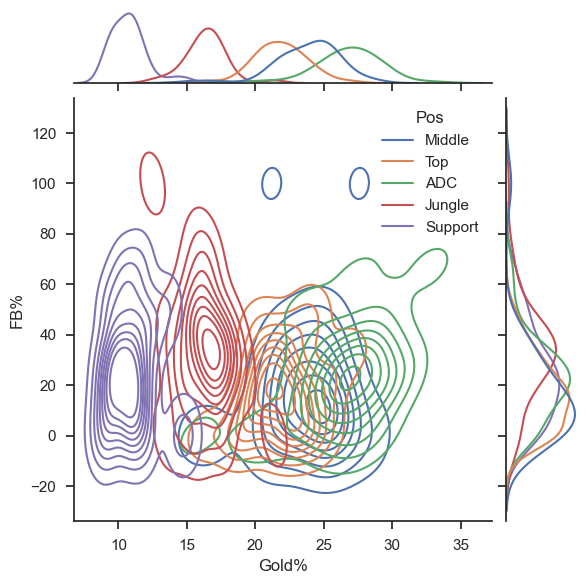

In [351]:
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="Gold%", y="FB%", hue="Pos",
    kind="kde",
)

## K-Means clustering


In [359]:
# Choosing the different labels.
# Here I look at the stats that showcases individual aspects of the players in accordance to the role they are playing.
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

X = df.loc[:, ('Pos','CS%P15','DPM','DMG%','CSD10','Gold%')]

y = df['Pos']

X['Pos'] = le.fit_transform(X['Pos'])

y = le.transform(y)

I wanted to use 5 clusters, as there are 5 different roles in the game, however it seemed that 3 clusters actually helps the model more (elbow plot later also proves this). This also is kinda relevant to the game dicussion, as while there are 5 roles, some fill different aspects of the team, which is often categorized as: supportive, carry, mix.

In [367]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 2011

km = KMeans(n_clusters=nclusters, random_state=seed,n_init='auto')
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)

In [368]:
# Sillouette score to find the accuracy of the clustering, in which the accuracy score is in the middle.
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5629249536263254

## K-Means clustering and elbow plot

Using the elbow method to find out how many clusters is needed, I create an elbow plot from 1 through 10. I then determin the cluster at the apex(?) of the elbow to decide how many clusters.

In [362]:
# Import KMeans and build a model
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

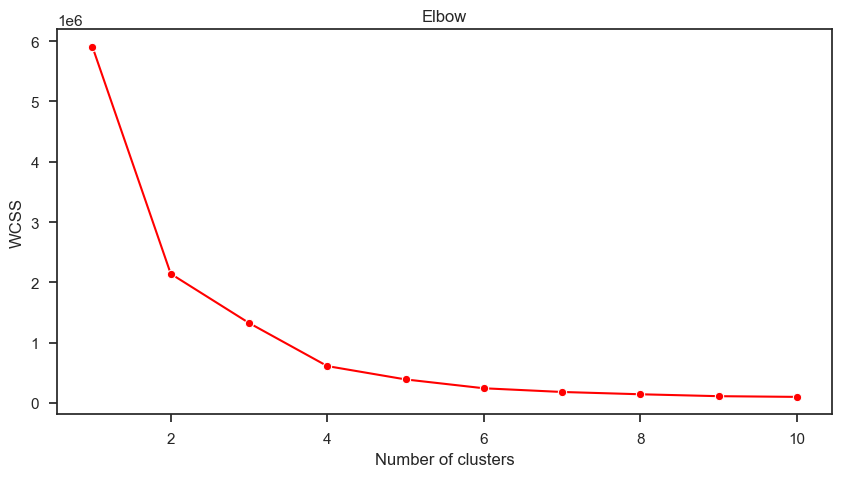

In [363]:
import seaborn as sns

# Use that model to decide, using the Elbow Method, the best number of clusters to build
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The apex is around the 3 and 4 mark, and both of them work. However, I found more success with a cluster of 3. I then cluster the values, and here I use two different metrics: the gold share of the team, and the damage share of the team. This way we are able to cluster the different roles of the players in the games on these two measures.

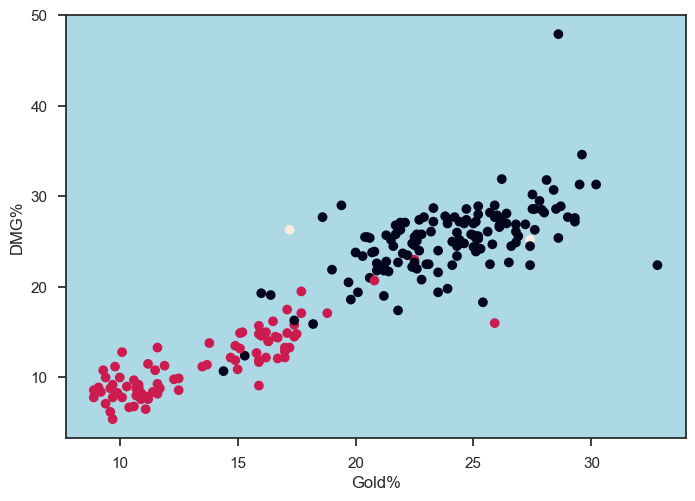

In [380]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init='auto', init = 'k-means++')
kmeans.fit(X)
labels = kmeans.predict(X)

ax = plt.axes()
ax.set_facecolor("lightblue")
plt.scatter(df['Gold%'],df['DMG%'],c = labels)
plt.xlabel('Gold%')
plt.ylabel('DMG%')
plt.show()

I then calculate the accuracy which is... alright at 35.3%.

In [381]:
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.3f}'. format(correct_labels/float(y.size)))

Result: 78 out of 221 samples were correctly labeled.
Accuracy score: 0.353


# K-Means Pyrcaret

I also wanted to try using the PyCaret library for the k-means, to see if I can get some different results. Spoiler alert, it's about the same.

In [382]:
import pycaret
#Setting up the pycaret experiment

from pycaret.clustering import *

myX = df.loc[:, ('Pos','CS%P15','DPM','DMG%','CSD10','Gold%')]
myX['Pos'] = le.fit_transform(myX['Pos'])

mys = setup(myX, session_id = 456)

,Description,Value
0,Session id,456
1,Original data shape,"(221, 6)"
2,Transformed data shape,"(221, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [383]:
# Comparing
mykmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6450,435.8734,0.3517,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [384]:
mykmeans_cluster = assign_model(mykmeans)
mykmeans_cluster.tail()

,Pos,CS%P15,DPM,DMG%,CSD10,Gold%,Cluster
216,1,12.500000,251.0,16.200001,-6.0,16.500000,Cluster 1
217,0,38.700001,344.0,22.400000,-8.0,32.799999,Cluster 0
218,4,23.900000,440.0,26.100000,-1.7,23.200001,Cluster 0
219,1,9.700000,274.0,15.000000,3.7,15.200000,Cluster 1
220,1,11.100000,247.0,13.800000,-3.4,13.800000,Cluster 1


In [385]:
evaluate_model(mykmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [386]:
# convert X to a dataframe
mylabels=predict_model(mykmeans,data=mykmeans_cluster)
# turn "Cluster n" to the number n
mylabels['Cluster'] = mylabels['Cluster'].str.replace('Cluster ','')
mylabels


,Pos,CS%P15,DPM,DMG%,CSD10,Gold%,Cluster
0,2.0,26.600000,417.0,24.600000,-3.3,22.500000,0
1,4.0,22.400000,354.0,21.799999,1.7,20.900000,0
2,0.0,33.400002,458.0,25.600000,-3.9,26.900000,0
3,1.0,13.200000,255.0,14.900000,-1.8,17.100000,1
4,4.0,23.600000,444.0,25.500000,-10.0,20.400000,0
...,...,...,...,...,...,...,...
216,1.0,12.500000,251.0,16.200001,-6.0,16.500000,1
217,0.0,38.700001,344.0,22.400000,-8.0,32.799999,0
218,4.0,23.900000,440.0,26.100000,-1.7,23.200001,0
219,1.0,9.700000,274.0,15.000000,3.7,15.200000,1


In [387]:
correct_labels = sum(mylabels['Pos'].astype(int) == mylabels['Cluster'].astype(int))

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.3f}'. format(correct_labels/float(y.size)))


Result: 78 out of 221 samples were correctly labeled.
Accuracy score: 0.353
